<a href="https://colab.research.google.com/github/piaseckazaneta/Python/blob/main/Python_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing required libraries

This command installs the required Python libraries in the Colab environment:

- geopandas – for working with geospatial vector data

- matplotlib – for plotting maps and charts

- requests – for downloading files from the internet

Colab does not keep installed libraries between sessions, so this step is required.

In [1]:
!pip install matplotlib geopandas requests

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

Downloading the dataset (Warsaw districts)

This code sends an HTTP GET request to download a GeoJSON file containing the administrative boundaries of Warsaw districts from GitHub.

In [3]:
url = "https://raw.githubusercontent.com/andilabs/warszawa-dzielnice-geojson/master/warszawa-dzielnice.geojson"
r = requests.get(url)

Saving the downloaded file locally

Explanation:
The downloaded content is saved as a local file in the Colab runtime:

- "wb" means write binary

- this allows GeoPandas to read the file in the next step


In [4]:
with open("warszawa-dzielnice.geojson", "wb") as f:
  f.write(r.content)

print("Plik dzielnic pobrany pomyślnie")

Plik dzielnic pobrany pomyślnie


Loading the GeoJSON into GeoPandas

This reads the GeoJSON file and loads it into a GeoDataFrame, which is a Pandas DataFrame with a geometry column.

In [5]:
districts_gdf = gpd.read_file("warszawa-dzielnice.geojson")

Exploring the dataset structure

info() shows the columns, data types, and geometry type

head() displays the first few rows to understand the attribute data

This is a standard first step in any data analysis workflow.

In [6]:
print("📊 Info o geometrii i kolumnach:")
print(districts_gdf.info())
print(districts_gdf.head())

📊 Info o geometrii i kolumnach:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  19 non-null     int32   
 1   name        19 non-null     object  
 2   geometry    19 non-null     geometry
dtypes: geometry(1), int32(1), object(1)
memory usage: 512.0+ bytes
None
   cartodb_id       name                                           geometry
0           1   Warszawa  MULTIPOLYGON (((21.02753 52.36513, 21.02539 52...
1          22     Ochota  MULTIPOLYGON (((21.00152 52.22807, 20.99059 52...
2          25  Rembertów  MULTIPOLYGON (((21.13242 52.23909, 21.13313 52...
3           2     Bemowo  MULTIPOLYGON (((20.87309 52.21666, 20.87307 52...
4          19  Białołęka  MULTIPOLYGON (((20.99622 52.28734, 20.99782 52...


Plotting a basic map

This creates a simple static map of Warsaw districts:

- figsize controls the map size

- edgecolor highlights district borders

- axes are turned off for a cleaner cartographic output

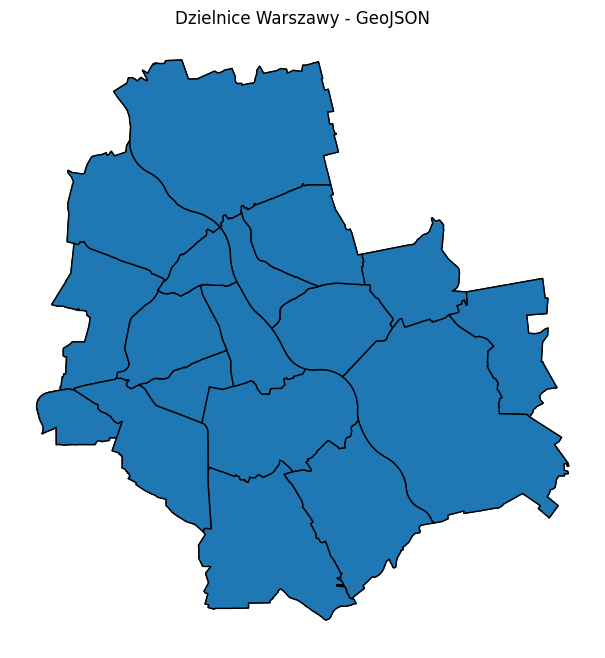

In [ ]:
ax = districts_gdf.plot(figsize=(8, 8), edgecolor='black', column=None)
ax.set_title("Dzielnice Warszawy - GeoJSON")
plt.axis('off')
plt.show()


Python variables & types (using Warsaw districts)

In [ ]:
type(districts_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
city_name = "Warsaw"
number_of_districts = (len(districts_gdf))

In [ ]:
print(type(city_name))
print(type(number_of_districts))

<class 'str'>
<class 'int'>


In [ ]:
print(districts_gdf.crs)

EPSG:4326


In [7]:
districts_gdf_projected = districts_gdf.to_crs(epsg=2180)
print(districts_gdf_projected.crs)

EPSG:2180


In [8]:
districts_gdf_projected["area_m2"] = districts_gdf_projected.geometry.area

In [ ]:
districts_gdf_projected

,cartodb_id,name,geometry,area_m2
0,1,Warszawa,"MULTIPOLYGON (((638006.999 501843.502, 637866....",5.168868e+08
1,22,Ochota,"MULTIPOLYGON (((636658.397 486555.359, 635919....",9.680919e+06
2,25,Rembertów,"MULTIPOLYGON (((645558.589 488036.332, 645605....",1.929143e+07
3,2,Bemowo,"MULTIPOLYGON (((627922.583 485053.359, 627921....",2.496911e+07
4,19,Białołęka,"MULTIPOLYGON (((636114.73 493135.194, 636221.6...",7.306188e+07
5,31,Wesoła,"MULTIPOLYGON (((654484.596 485077.679, 654402....",2.293394e+07
6,20,Bielany,"MULTIPOLYGON (((627976.969 493665.377, 627941....",3.229142e+07
7,21,Mokotów,"MULTIPOLYGON (((638727.391 484253.046, 638710....",3.557523e+07
8,23,Praga Południe,"MULTIPOLYGON (((642937.562 485314.028, 643191....",2.232466e+07
9,24,Praga Północ,"MULTIPOLYGON (((637243.873 494002.159, 637233....",1.140738e+07


In [ ]:
first_area = districts_gdf_projected["area_m2"].iloc[0]
type(first_area)

numpy.float64

In [ ]:
first_district_name = districts_gdf_projected["name"].iloc[0]

In [ ]:
print(first_district_name)

Warszawa


In [ ]:
type(first_district_name)

str

In [ ]:
label = f"District: {first_district_name}"
print(label)

District: Warszawa


In [ ]:
district_names = list(districts_gdf_projected["name"])
type(district_names)


list

In [ ]:
type(district_names[0])

str

Python data types learned today:
- GeoDataFrame (spatial table)
- int (counts, indices)
- float (areas, distances)
- str (district names, labels)
- list (collections of district names)

Day 3 – Python lists and iteration (using Warsaw districts)

Creating a list from a GeoDataFrame

A Python list can be created directly from a GeoDataFrame column to work with attribute values independently from geometry.

In [ ]:
districts_names = list(districts_gdf["name"])

List indexing

Lists are zero-indexed in Python, which allows direct access to specific elements by position.

In [ ]:
districts_names[0]

'Warszawa'

In [ ]:
first_district = districts_names[0]
last_district = districts_names[-1]

Iterating over a list

A for loop executes the same operation for each element in a list, enabling batch processing of spatial entities.

In [ ]:
for district in districts_names:
  print(district)

Warszawa
Ochota
Rembertów
Bemowo
Białołęka
Wesoła
Bielany
Mokotów
Praga Południe
Praga Północ
Śródmieście
Targówek
Ursus
Wola
Ursynów
Wawer
Wilanów
Włochy
Żoliborz


Using list values to filter a GeoDataFrame

List elements can be used as dynamic filters to select spatial features from a GeoDataFrame.

In [ ]:
for district in districts_names:
  geom = districts_gdf_projected[districts_gdf_projected["name"] == district].geometry

Collecting results in a list

Lists are commonly used to accumulate numerical results (e.g. areas) generated during spatial analysis loops.

In [ ]:
areas = []
for district in districts_names:
  area = districts_gdf_projected[districts_gdf_projected["name"] == district].geometry.area.values[0]
  areas.append(area)

In [ ]:
print(type(areas))
print(len(areas))

<class 'list'>
19


Pairing values using zip()

The zip() function combines multiple lists into structured pairs, which is useful for building tables and summaries.

In [ ]:
district_area_pairs = list(zip(districts_names, areas))
district_area_pairs

[('Warszawa', np.float64(516886839.53242576)),
 ('Ochota', np.float64(9680918.846873578)),
 ('Rembertów', np.float64(19291430.02839642)),
 ('Bemowo', np.float64(24969109.310506955)),
 ('Białołęka', np.float64(73061877.60451895)),
 ('Wesoła', np.float64(22933939.831140257)),
 ('Bielany', np.float64(32291417.933313172)),
 ('Mokotów', np.float64(35575226.84906865)),
 ('Praga Południe', np.float64(22324657.260164324)),
 ('Praga Północ', np.float64(11407382.349971365)),
 ('Śródmieście', np.float64(15597598.955951367)),
 ('Targówek', np.float64(24115466.34435755)),
 ('Ursus', np.float64(9341462.84463125)),
 ('Wola', np.float64(19369692.841326162)),
 ('Ursynów', np.float64(44016922.8813024)),
 ('Wawer', np.float64(79588377.46449468)),
 ('Wilanów', np.float64(36451153.25871982)),
 ('Włochy', np.float64(28518232.18604057)),
 ('Żoliborz', np.float64(8351972.741647601))]

Iterating over GeoDataFrame rows

iterrows() allows row-by-row access to attributes and geometry, bridging Python iteration with spatial objects.



In [ ]:
for idx, row in districts_gdf_projected.iterrows():
  print(row["name"])
  print(row.geometry)

Warszawa
MULTIPOLYGON (((638006.9987609453 501843.50193492044, 637866.8410165876 501643.41268118937, 637845.6314282075 501366.99062601384, 637802.7632940006 501263.09224222973, 637752.524811766 500979.4052764941, 637625.4140279422 500898.63259025663, 637568.1501511136 500921.9559043404, 637090.0843170093 500805.7028373545, 637067.1493402988 500892.9637139952, 636836.2727163016 500883.2045165347, 636760.2813400535 500918.7008401174, 636719.3809271483 501037.39707687125, 636713.5898145174 501250.8644648008, 636706.6997403672 501253.6772969095, 636522.4841821807 501686.725622626, 636435.6566749704 501656.61358160153, 636357.7914116762 501632.4258363331, 636282.1116825835 501622.7642217735, 636136.9882997652 501584.8133134926, 636100.6064574121 501570.3444065247, 636070.4210695034 501538.6898382958, 636044.4223780874 501513.2706911173, 635939.6422627575 501469.54244565126, 635894.6531198461 501446.047616018, 635805.660037324 501422.5630920511, 635780.7802755267 501413.3095438676, 635591.86

Day 3 summary:
- list: ordered collection of values
- indexing: access elements by position
- for loop: iterate over districts
- lists are used to collect analysis results
- iteration connects Python logic with spatial data

Python dictionaries and functions (using Warsaw districts)

Creating a dictionary from district data

In [9]:
district_area_dict = {}

In [10]:
for idx, row in districts_gdf_projected.iterrows():
  district_area_dict[row["name"]] = row.geometry.area

In [11]:
print(district_area_dict)

{'Warszawa': 516886839.53242576, 'Ochota': 9680918.846873578, 'Rembertów': 19291430.02839642, 'Bemowo': 24969109.310506955, 'Białołęka': 73061877.60451895, 'Wesoła': 22933939.831140257, 'Bielany': 32291417.933313172, 'Mokotów': 35575226.84906865, 'Praga Południe': 22324657.260164324, 'Praga Północ': 11407382.349971365, 'Śródmieście': 15597598.955951367, 'Targówek': 24115466.34435755, 'Ursus': 9341462.84463125, 'Wola': 19369692.841326162, 'Ursynów': 44016922.8813024, 'Wawer': 79588377.46449468, 'Wilanów': 36451153.25871982, 'Włochy': 28518232.18604057, 'Żoliborz': 8351972.741647601}


In [12]:
districts_gdf_projected.iterrows()

<generator object DataFrame.iterrows at 0x792b3239c590>

Accessing dictionary values

In [13]:
district_area_dict["Mokotów"]

35575226.84906865

Writing a function to convert area units

In [14]:
def area_m2_to_ha(area_m2):
  return area_m2/10000

In [15]:
area_m2_to_ha(district_area_dict["Mokotów"])

3557.522684906865

In [16]:
def double(x):
  return x*2

In [17]:
double(district_area_dict["Wola"])

38739385.682652324

Applying a function to dictionary values

In [19]:
district_area_ha_dict = {}
for district, area_m2 in district_area_dict.items():
  district_area_ha_dict[district] = area_m2_to_ha(area_m2)